In [4]:
import numpy as np
ar=np.array([[1,2,3],[45,6,78],[89,90,6]])
n=np.array([12,23,45])
#print("original array:",ar)
new=np.r_[ar,[n]]
print(new)

[[ 1  2  3]
 [45  6 78]
 [89 90  6]
 [12 23 45]]


In [5]:
import pandas as pd
df=pd.DataFrame(np.random.randn(5,4),['A','B','C','D','E'],['w','x','y','z'])
df

,w,x,y,z
A,-0.066533,-2.465836,1.303154,-0.161686
B,0.375065,-2.094079,-0.035741,-0.872518
C,0.477408,-0.586397,-0.281044,-0.179361
D,-0.767500,0.539105,-1.398568,-0.524356
E,-0.034345,0.662488,1.962409,-0.024183


In [7]:
df.loc['A']

w   -0.066533
x   -2.465836
y    1.303154
z   -0.161686
Name: A, dtype: float64

In [9]:
df.loc[['A','C']]

,w,x,y,z
A,-0.066533,-2.465836,1.303154,-0.161686
C,0.477408,-0.586397,-0.281044,-0.179361


In [10]:
df.iloc[3]

w   -0.767500
x    0.539105
y   -1.398568
z   -0.524356
Name: D, dtype: float64

In [11]:
df.loc['B','y']

-0.03574144036299847

In [13]:
df.loc[['A','B'],['w','z']]

,w,z
A,-0.066533,-0.161686
B,0.375065,-0.872518


In [14]:
print(df>0)

,w,x,y,z
A,False,False,True,False
B,True,False,False,False
C,True,False,False,False
D,False,True,False,False
E,False,True,True,False


In [15]:
print(df[df>0])

          w         x         y   z
A       NaN       NaN  1.303154 NaN
B  0.375065       NaN       NaN NaN
C  0.477408       NaN       NaN NaN
D       NaN  0.539105       NaN NaN
E       NaN  0.662488  1.962409 NaN


In [16]:
df['w']

A   -0.066533
B    0.375065
C    0.477408
D   -0.767500
E   -0.034345
Name: w, dtype: float64

In [17]:
df[df['w']>0]

,w,x,y,z
B,0.375065,-2.094079,-0.035741,-0.872518
C,0.477408,-0.586397,-0.281044,-0.179361


In [18]:
df['w']>0

A    False
B     True
C     True
D    False
E    False
Name: w, dtype: bool

In [19]:
d={"A":[1,2,np.nan],"B":[5,np.nan,np.nan],"C":[1,2,3],"D":[np.nan,np.nan,np.nan]}
d

{'A': [1, 2, nan], 'B': [5, nan, nan], 'C': [1, 2, 3], 'D': [nan, nan, nan]}

In [20]:
df1=pd.DataFrame(d)
df1

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [21]:
df1.dropna()

,A,B,C,D


In [22]:
df1.dropna(how="all")

,A,B,C,D
0,1.0,5.0,1,NaN
1,2.0,NaN,2,NaN
2,NaN,NaN,3,NaN


In [23]:
print(df1.dropna(how="any"))

Empty DataFrame
Columns: [A, B, C, D]
Index: []


In [24]:
print(df1.dropna(how='all'))

     A    B  C   D
0  1.0  5.0  1 NaN
1  2.0  NaN  2 NaN
2  NaN  NaN  3 NaN


In [25]:
df1.dropna(how="any")

,A,B,C,D


In [26]:
df1.dropna(how="all",axis=1)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [27]:
df1.isna()

,A,B,C,D
0,False,False,False,True
1,False,True,False,True
2,True,True,False,True


In [28]:
df1.isna().sum()

A    1
B    2
C    0
D    3
dtype: int64

In [32]:
df1.dropna(thresh=2,axis=1)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [33]:
df1.fillna(value=0)

,A,B,C,D
0,1.0,5.0,1,0.0
1,2.0,0.0,2,0.0
2,0.0,0.0,3,0.0


In [34]:
df1['A'].fillna(value=df1['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [35]:
data={'company':['Google','Google','Meta','Meta','Fb','Fb'],'person':['sam','mani','sai','prasanth','mohan','mounika'],
      'salaries':[300,500,100,200,600,20]}
df2=pd.DataFrame(data)
df2

,company,person,salaries
0,Google,sam,300
1,Google,mani,500
2,Meta,sai,100
3,Meta,prasanth,200
4,Fb,mohan,600
5,Fb,mounika,20


In [36]:
bycomp=df2.groupby('company')
bycomp

In [37]:
bycomp.sum()

,person,salaries
company,,
Fb,mohanmounika,620
Google,sammani,800
Meta,saiprasanth,300


In [38]:
bycomp['person']

In [39]:
bycomp.value_counts()

company  person    salaries
Fb       mohan     600         1
         mounika   20          1
Google   mani      500         1
         sam       300         1
Meta     prasanth  200         1
         sai       100         1
Name: count, dtype: int64

In [40]:
bycomp.max()

,person,salaries
company,,
Fb,mounika,600
Google,sam,500
Meta,sai,200


In [43]:
bycomp.describe()

salaries                                                      
           count   mean         std    min    25%    50%    75%    max
company                                                               
Fb           2.0  310.0  410.121933   20.0  165.0  310.0  455.0  600.0
Google       2.0  400.0  141.421356  300.0  350.0  400.0  450.0  500.0
Meta         2.0  150.0   70.710678  100.0  125.0  150.0  175.0  200.0

In [48]:
df2.loc[bycomp['salaries'].idxmax()][['company','person','salaries']]

,company,person,salaries
4,Fb,mohan,600
1,Google,mani,500
3,Meta,prasanth,200


In [61]:
df=pd.read_csv(r"C:\Users\kedar\Downloads\samplecsv.csv",header=4)
df

,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285","ANZSIC06 divisions A-S (excluding classes K6330, L6711, O7552, O760, O771, O772, S9540, S9601, S9602, and S9603)"
0,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H09,Interest and donations,Financial performance,"32,730",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"7,509",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,"26,821",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"119,387",ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
37071,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37072,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37073,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37074,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [58]:
df.head()

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...


In [59]:
df.tail()

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
37075,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H37,Quick ratio,Financial ratios,52,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37076,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H38,Margin on sales of goods for resale,Financial ratios,40,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37077,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H39,Return on equity,Financial ratios,12,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37078,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H40,Return on total assets,Financial ratios,5,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."
37079,2013,Level 3,ZZ11,Food product manufacturing,Percentage,H41,Liabilities structure,Financial ratios,46,"ANZSIC06 groups C111, C112, C113, C114, C115, ..."


In [60]:
df.head(10)

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2020,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,"733,258",ANZSIC06 divisions A-S (excluding classes K633...
1,2020,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,"660,630",ANZSIC06 divisions A-S (excluding classes K633...
2,2020,Level 1,99999,All industries,Dollars (millions),H05,"Interest, dividends and donations",Financial performance,"54,342",ANZSIC06 divisions A-S (excluding classes K633...
3,2020,Level 1,99999,All industries,Dollars (millions),H07,Non-operating income,Financial performance,"18,285",ANZSIC06 divisions A-S (excluding classes K633...
4,2020,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,"654,872",ANZSIC06 divisions A-S (excluding classes K633...
5,2020,Level 1,99999,All industries,Dollars (millions),H09,Interest and donations,Financial performance,"32,730",ANZSIC06 divisions A-S (excluding classes K633...
6,2020,Level 1,99999,All industries,Dollars (millions),H10,Indirect taxes,Financial performance,"7,509",ANZSIC06 divisions A-S (excluding classes K633...
7,2020,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,"26,821",ANZSIC06 divisions A-S (excluding classes K633...
8,2020,Level 1,99999,All industries,Dollars (millions),H12,Salaries and wages paid,Financial performance,"119,387",ANZSIC06 divisions A-S (excluding classes K633...
9,2020,Level 1,99999,All industries,Dollars (millions),H13,Redundancy and severance,Financial performance,305,ANZSIC06 divisions A-S (excluding classes K633...


In [63]:
df=pd.read_csv(r"C:\Users\kedar\Downloads\delimatercsv.csv",sep=';')
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,22,Los Angeles


In [64]:
a=8
b=6
c=5
print(a,b,c,sep='\n')

8
6
5


In [65]:
df=pd.read_csv(r"C:\Users\kedar\Downloads\delimatercsv.csv",sep=';',names=['shannu','ages','places'])
df

,shannu,ages,places
0,Name,Age,City
1,Alice,25,New York
2,Bob,30,San Francisco
3,Charlie,22,Los Angeles


In [69]:
names={"shannu":'rahul',"ages":'all_ages',"places":'place'}
df=df.rename(columns=names)
df

,rahul,all_ages,place
0,Name,Age,City
1,Alice,25,New York
2,Bob,30,San Francisco
3,Charlie,22,Los Angeles


In [34]:
import pandas as pd
df_titanic=pd.read_csv(r"C:\Users\kedar\Downloads\titanic_train.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
df_titanic.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [75]:
df_titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [76]:
df_titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [77]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df_titanic.isna().sum()*100/len(df_titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [81]:
(df_titanic.isna().sum()/df_titanic.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
ans=(df_titanic.isna().sum()/df_titanic.shape[0])*100
val=ans.max()
val

77.10437710437711

In [6]:
len(df_titanic)

891

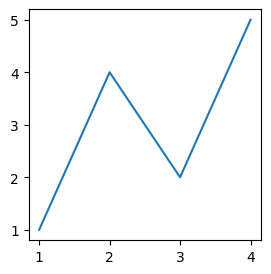

In [1]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=[1,4,2,5]
plt.figure(figsize=(3,3))
plt.plot(x,y)

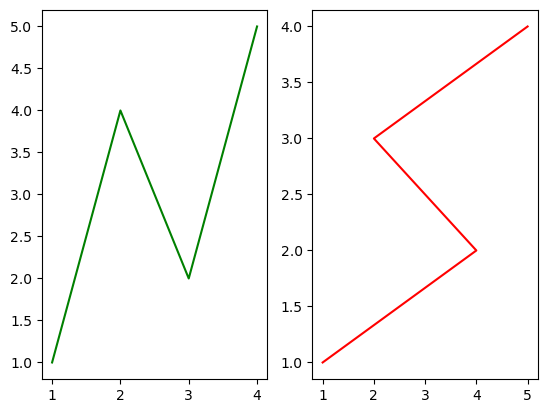

In [7]:
plt.subplot(1,2,1)
plt.plot(x,y,'g')
plt.subplot(1,2,2)
plt.plot(y,x,'r')

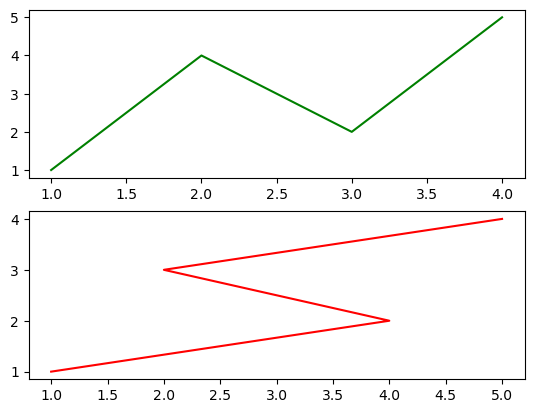

In [8]:
plt.subplot(2,1,1)
plt.plot(x,y,'g')
plt.subplot(2,1,2)
plt.plot(y,x,'r')

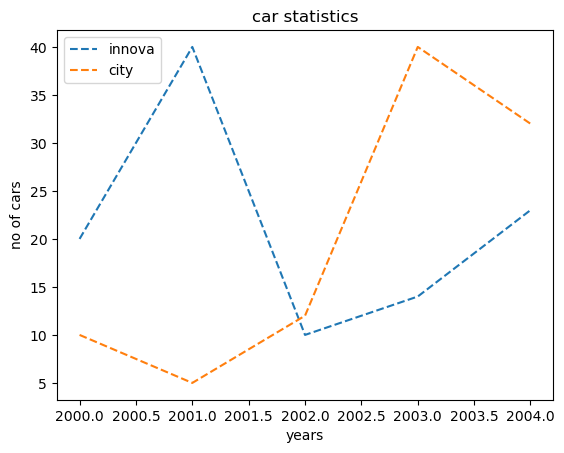

In [17]:
import numpy as np
years=np.arange(2000,2005,dtype=int)
y_innova=np.array([20,40,10,14,23])
plt.plot(years,y_innova,"--")
y_honda_city=np.array([10,5,12,40,32])
plt.plot(years,y_honda_city,"--")
plt.xlabel("years")
plt.ylabel("no of cars")
plt.title("car statistics")
plt.legend(["innova","city"])

Text(0.5, 1.0, 'Electronic products statistics')

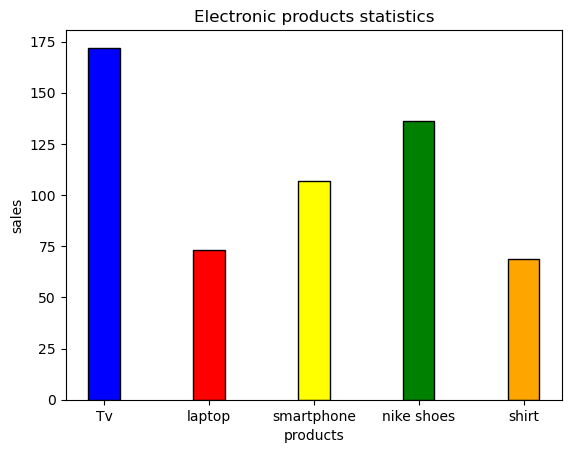

In [26]:
products=['Tv','laptop','smartphone','nike shoes','shirt']
sales=np.random.randint(30,200,size=len(products))
plt.bar(products,sales,color=["blue","red","yellow","green","orange"],width=0.3,edgecolor="black")
plt.xlabel("products")
plt.ylabel("sales")
plt.title("Electronic products statistics")

Text(0.5, 1.0, 'products statistics')

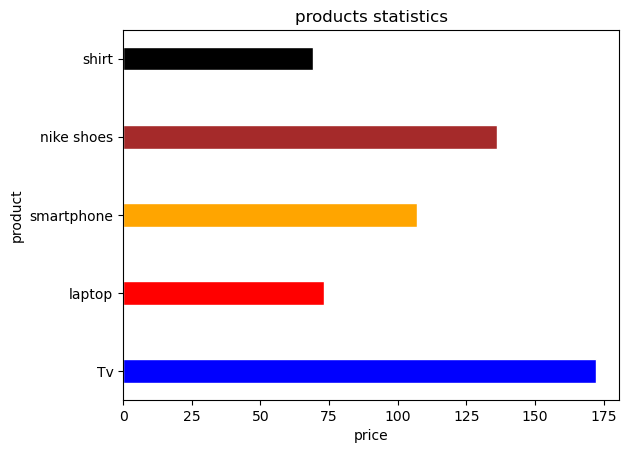

In [30]:
plt.barh(products,sales,height=0.3,color=["blue","red","orange","brown","black"],edgecolor="white")
plt.ylabel("product")
plt.xlabel("price")
plt.title("products statistics")

Text(0.5, 1.0, 'Student statistics')

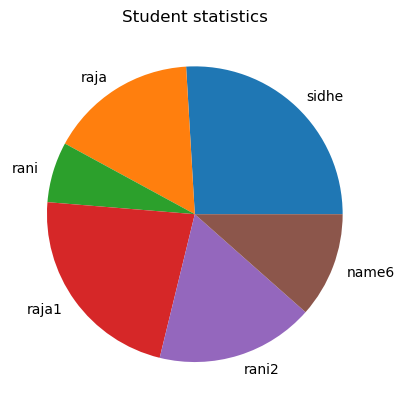

In [32]:
student_name=["sidhe","raja","rani","raja1","rani2","name6"]
scores=[90,56,23,78,60,40]
plt.pie(scores,labels=student_name)
plt.title("Student statistics")

In [43]:
h=df_titanic['Sex'].value_counts()
h

Sex
male      577
female    314
Name: count, dtype: int64

In [44]:
h.male

577

In [45]:
h.female

314

<BarContainer object of 2 artists>

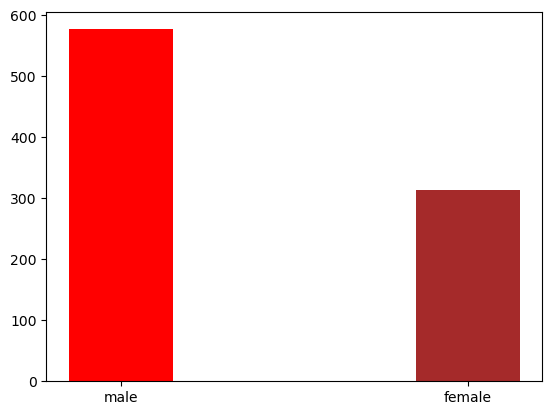

In [49]:
plt.figure
c=['male','female']
d=([h.male,h.female])
plt.bar(c,d,color=['red','brown'],width=0.3)

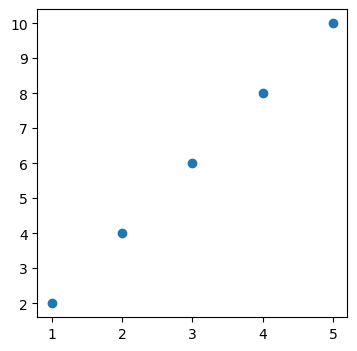

In [50]:
plt.figure(figsize=(4,4))
x_data=[1,2,3,4,5]
y_data=[2,4,6,8,10]
plt.scatter(x_data,y_data)

In [1]:
#seaborn
import seaborn as sns
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
#iris
tips=sns.load_dataset('iris')
tips

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
#flights
tips=sns.load_dataset('flights')
tips

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [4]:
#planets
tips=sns.load_dataset('planets')
tips

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [5]:
#diamonds
tips=sns.load_dataset('diamonds')
tips

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
